In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imsave

n_colors = 10

sample_img = imread('resources/girl.jpg')
w,h,_ = sample_img.shape
sample_img = sample_img.reshape(w*h,3)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)

In [2]:
# find out which cluster each pixel belongs to.
labels = kmeans.predict(sample_img)

In [3]:
# the cluster centroids is our color palette
identified_palette = np.array(kmeans.cluster_centers_).astype(int)

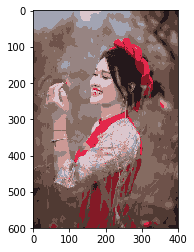

In [4]:
# recolor the entire image
recolored_img = np.copy(sample_img)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_palette[labels[index]]
    
# reshape for display
recolored_img = recolored_img.reshape(w,h,3)

imsave('kmeans_color_q.jpg', recolored_img)
plt.imshow(recolored_img)